In [1]:
from default_import import *
from dat_analysis.plotting.plotly.plotly_util import make_slider_figure
from itertools import chain

importing


Dot tuning with CSS and RC1 on the axes holding N constant.


If we switch 4 variables:
- ACC (-20, -10, 0, 10, 20)
- Plunger (-450, -500, -550, -600)
- Nose (-200, -220, -240, -260, -280, -300)
- Bias (10uV, 100uV)

In [82]:
def batch_list(l, batch_size, batch_sep):
    ret = []
    for i in range(0, batch_sep, batch_size):
        vals = [l[i+j::batch_sep] for j in range(batch_size)]
        vals_list = list(sorted(chain(*vals)))   
        ret.append(
            vals_list
        )
    return ret

all_datnums = list(range(337, 576+1))
num_bias = 2
num_nose = 6
num_plunger = 4
num_acc = 5

# all_datnums = list(range(num_bias*num_nose*num_plunger*num_acc))

fixed_bias = batch_list(all_datnums, 1, num_bias)
fixed_nose = batch_list(all_datnums, num_bias, num_bias*num_nose)
fixed_plunger = batch_list(all_datnums, num_bias*num_nose, num_bias*num_nose*num_plunger)
fixed_acc = batch_list(all_datnums, num_bias*num_nose*num_plunger, num_bias*num_nose*num_plunger*num_acc)
    
    
fixed_bias = {
    10: fixed_bias[0],
    100: fixed_bias[1],
}

fixed_nose = {-200-i*20: v for i, v in enumerate(fixed_nose)}
fixed_plunger = {-450-i*50: v for i, v in enumerate(fixed_plunger)}
fixed_acc = {-20+i*10: v for i, v in enumerate(fixed_acc)}

for l in [fixed_bias, fixed_nose, fixed_plunger, fixed_acc]:
    for k, v in l.items():
        print(k, len(v))
        # print(k, v)
    print('\n\n')
    
# np.array(fixed_plunger)

10 120
100 120



-200 40
-220 40
-240 40
-260 40
-280 40
-300 40



-450 60
-500 60
-550 60
-600 60



-20 48
-10 48
0 48
10 48
20 48





### Aiming for:
- fixed_bias = [0, 2, 4, 6, 8, ...], [1, 3, 5, 7, 9, ...]
- fixed_nose = [0, 1, 12, 13, ...], [2, 3, 14, 15, ...], [4, 5, 16, 17, ...], ..., ..., ...
- fixed_plunger = 
- fixed_acc = 


In [80]:
# Check that the datnums have been separated correctly
# vals = fixed_acc
# vals = fixed_plunger
# vals = fixed_nose
vals = fixed_bias

for j, (k, group) in enumerate(vals.items()):
    if group:
        print(f'Key in Dict is :{k}')
        dat = get_dat(group[0])
        print(f'\n\nFirst Dat in Set is Dat{dat.datnum} - {dat.Logs.comments}, {dat.Logs.dacs["CA1bias*543"]}\n\n')
        for i, num in enumerate(group):
            dat = get_dat(num)
            print(i, dat.Logs.comments, dat.Logs.dacs['CA1bias*543'])

Key in Dict is :10


First Dat in Set is Dat337 - ['conductance', 'ACC1*200 = -4000.0', 'P1a', 'P1b = -450.0', 'N1 = -200.0'], 7.0193


0 ['conductance', 'ACC1*200 = -4000.0', 'P1a', 'P1b = -450.0', 'N1 = -200.0'] 7.0193
1 ['conductance', 'ACC1*200 = -4000.0', 'P1a', 'P1b = -450.0', 'N1 = -220.0'] 7.0193
2 ['conductance', 'ACC1*200 = -4000.0', 'P1a', 'P1b = -450.0', 'N1 = -240.0'] 7.0193
3 ['conductance', 'ACC1*200 = -4000.0', 'P1a', 'P1b = -450.0', 'N1 = -260.0'] 7.0193
4 ['conductance', 'ACC1*200 = -4000.0', 'P1a', 'P1b = -450.0', 'N1 = -280.0'] 7.0193
5 ['conductance', 'ACC1*200 = -4000.0', 'P1a', 'P1b = -450.0', 'N1 = -300.0'] 7.0193
6 ['conductance', 'ACC1*200 = -4000.0', 'P1a', 'P1b = -500.0', 'N1 = -200.0'] 7.0193
7 ['conductance', 'ACC1*200 = -4000.0', 'P1a', 'P1b = -500.0', 'N1 = -220.0'] 7.0193
8 ['conductance', 'ACC1*200 = -4000.0', 'P1a', 'P1b = -500.0', 'N1 = -240.0'] 7.0193
9 ['conductance', 'ACC1*200 = -4000.0', 'P1a', 'P1b = -500.0', 'N1 = -260.0'] 7.0193
10 ['conductan

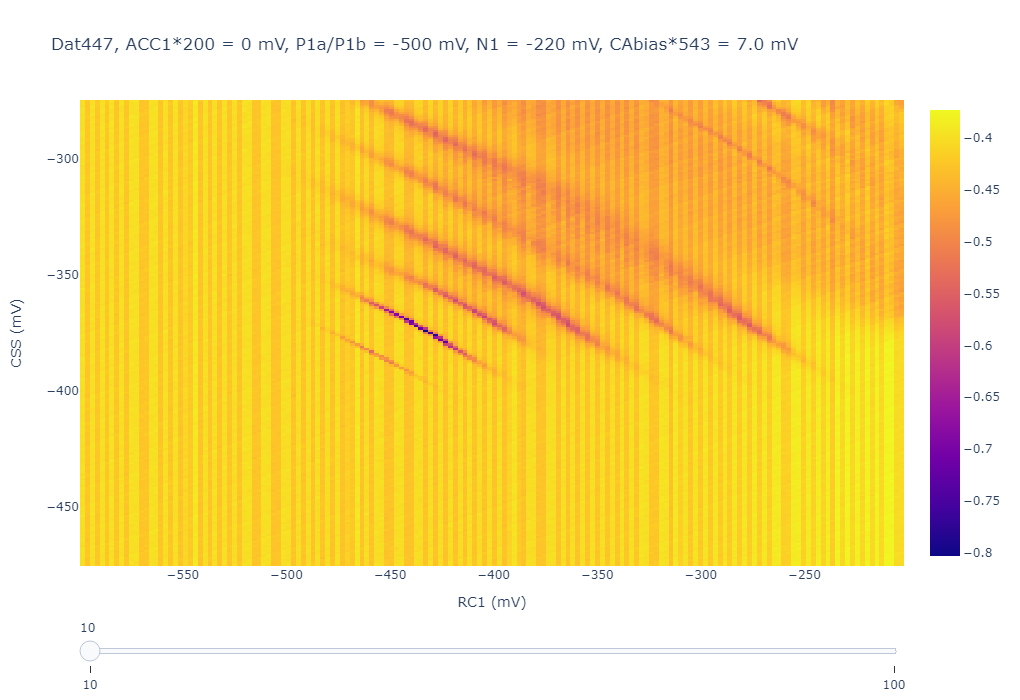

In [119]:
######## Setup parameters ########
# Leave one as None to make slider figure with that as the slider
bias = None
nose = -220
plunger = -500
acc = 0

##################################

if bias is None:
    sort_by = fixed_bias
elif nose is None:
    sort_by = fixed_nose
elif plunger is None:
    sort_by = fixed_plunger
elif acc is None:
    sort_by = fixed_acc
else:
    raise ValueError

nums = set(all_datnums)

for requirement, d in zip([bias, nose, plunger, acc], [fixed_bias, fixed_nose, fixed_plunger, fixed_acc]):
    if requirement is not None:
        nums = nums.intersection(d[requirement])
        
datas, xs, ys, ids, titles = list(), list(), list(), list(), list()
for k, v in sort_by.items():
    datnum = nums.intersection(v)
    if len(datnum) != 1:
        raise RuntimeError
    datnum = list(datnum)[0]
    dat = get_dat(datnum)
    x, y, data = dat.Data.x, dat.Data.y, dat.Data.get_data('current_2d')
    x, data = x[2:], data[:, 2:]
    data, x, y = U.resample_data(data, x, y, max_num_pnts=201)
    datas.append(data)
    xs.append(x)
    ys.append(y)
    ids.append(k)
    titles.append(f'Dat{dat.datnum}, ACC1*200 = {dat.Logs.dacs["ACC1*200"]:.0f} mV, P1a/P1b = {dat.Logs.dacs["P1a"]:.0f} mV, N1 = {dat.Logs.dacs["N1"]:.0f} mV, CAbias*543 = {dat.Logs.dacs["CA1bias*543"]:.1f} mV')
        
#     datas = [dat.Data.get_data('current_2d') for dat in dats]
#     xs = [dat.Data.x for dat in dats]
#     ys = [dat.Data.y for dat in dats]
#     ids = [U.sig_fig(dat.Logs.temperatures.mc*1000, sf=3) for dat in dats]
#     titles = [f'Dat{dat.datnum}, Temperature = {dat.Logs.temperatures.mc*1000:.0f} mK, P1a/P1b = {dat.Logs.dacs["P1a"]:.0f} mV, CAbias*100 = {dat.Logs.dacs["CA1bias*100"]:.1f} mV' for dat in dats]
#     labels = None
#     xlabel = dats[0].Logs.x_label
#     ylabel = dats[0].Logs.y_label
#     plot_kwargs = None
xlabel = dat.Logs.x_label
ylabel = dat.Logs.y_label
plot_kwargs = None
labels=None
    
fig = make_slider_figure(datas, xs, ys, ids, titles, labels, xlabel, ylabel, plot_kwargs)
fig.update_layout(height=700)
fig




